In [5]:
import pandas as pd
data = pd.read_csv('life Expectancy Data.csv')
data.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
data.shape

(2938, 22)

In [7]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
countries = data['Country'].unique()

nan_cols = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure','Diphtheria ', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years', 'Population', 'Income composition of resources']

for cols in nan_cols:
    for country in countries:
        data.loc[data['Country']== country, cols] = data.loc[data['Country'] == country, cols].fillna(data[data['Country'] == country][cols].mean())

In [9]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             17
percentage expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
 HIV/AIDS                            0
GDP                                405
Population                         648
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [10]:
data = data.dropna()
data.shape

(2128, 22)

In [11]:
data['Status'].value_counts()

Developing    1824
Developed      304
Name: Status, dtype: int64

In [12]:
data['Country'].value_counts()

Afghanistan          16
Mozambique           16
Poland               16
Philippines          16
Peru                 16
                     ..
Eritrea              16
Equatorial Guinea    16
El Salvador          16
Ecuador              16
Zimbabwe             16
Name: Country, Length: 133, dtype: int64

<AxesSubplot:>

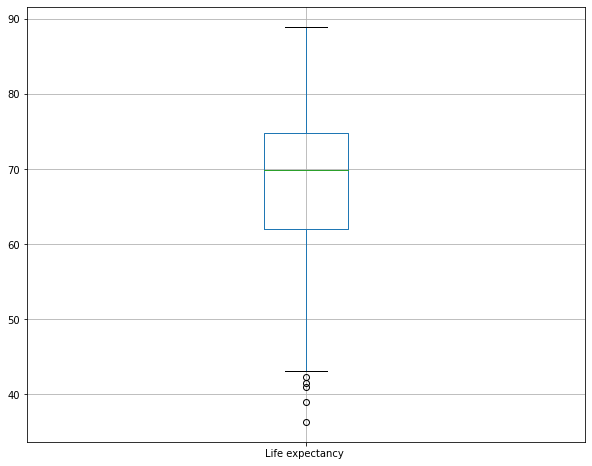

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
df.boxplot('Life expectancy ')
plt.subplot(1,2,1)
df['Life expectancy '].plot.kde()
plt.show()

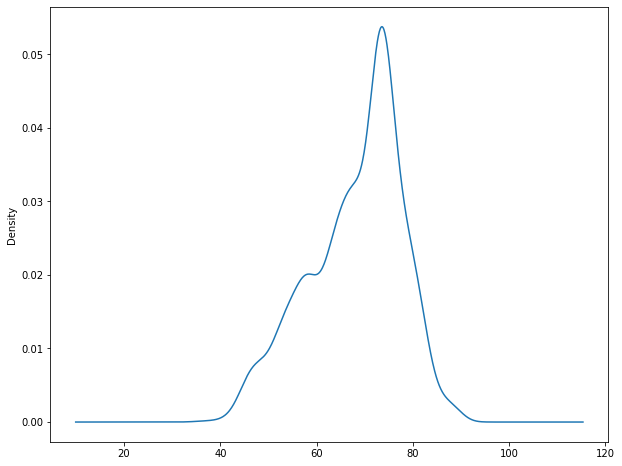

In [15]:
plt.figure(figsize=(10, 8))
data['Life expectancy '].plot.kde()
plt.show()

C:\Users\55839\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total expenditure')

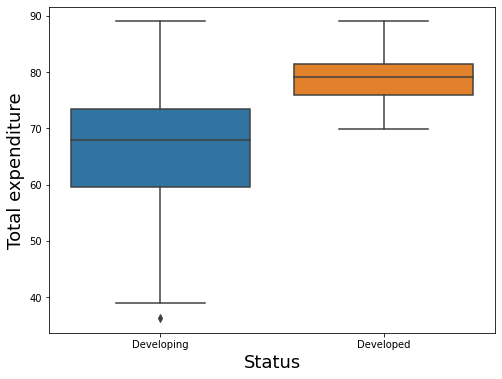

In [17]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.boxplot('Status', 'Life expectancy ', data = data)

plt.xlabel('Status', fontsize= 18)
plt.ylabel('Total expenditure', fontsize=18)

C:\Users\55839\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


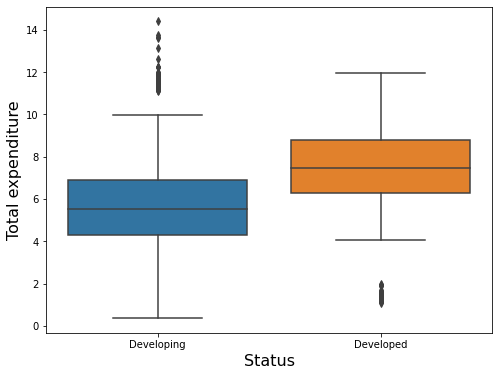

In [18]:
plt.figure(figsize=(8, 6))

sns.boxplot('Status', 'Total expenditure', data = data)

plt.xlabel('Status', fontsize = 16)
plt.ylabel('Total expenditure', fontsize = 16)

plt.show()

In [19]:
data_corr = data[['Life expectancy ', 
                  'Adult Mortality', 
                  'Schooling', 
                  'Total expenditure', 
                  'Diphtheria ', 
                  'GDP',
                  'Population']].corr()
data_corr

,Life expectancy,Adult Mortality,Schooling,Total expenditure,Diphtheria,GDP,Population
Life expectancy,1.000000,-0.662604,0.746619,0.203689,0.449975,0.445425,-0.011420
Adult Mortality,-0.662604,1.000000,-0.408661,-0.097938,-0.212157,-0.259500,-0.021050
Schooling,0.746619,-0.408661,1.000000,0.261679,0.432891,0.471767,-0.022453
Total expenditure,0.203689,-0.097938,0.261679,1.000000,0.183238,0.212498,-0.079752
Diphtheria,0.449975,-0.212157,0.432891,0.183238,1.000000,0.190957,-0.024167
GDP,0.445425,-0.259500,0.471767,0.212498,0.190957,1.000000,-0.016800
Population,-0.011420,-0.021050,-0.022453,-0.079752,-0.024167,-0.016800,1.000000


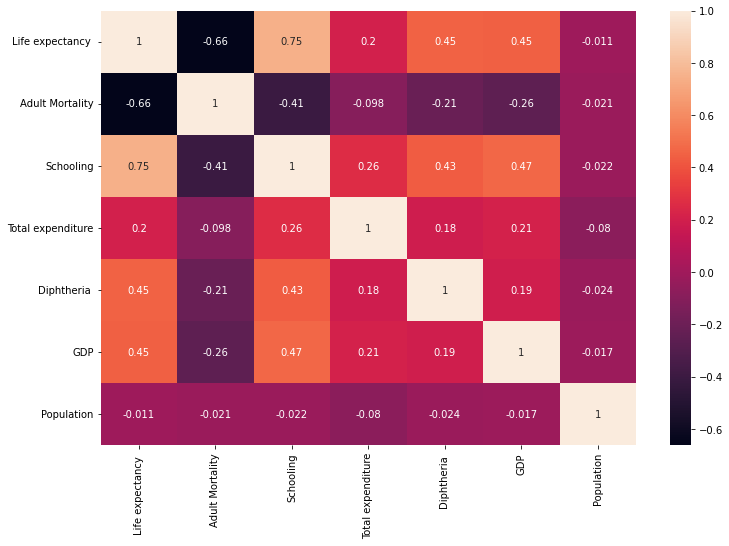

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(data_corr, annot=True)

plt.show()

In [21]:
features = data.drop('Life expectancy ', axis =1)
target = data[['Life expectancy ']]

In [22]:
features.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [23]:
target.columns

Index(['Life expectancy '], dtype='object')

In [24]:
target.sample(5)

,Life expectancy
1669,74.1
2012,73.7
302,61.7
521,46.3
347,48.1


In [25]:
features = features.drop('Country', axis=1)

features.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [26]:
categorical_features = features['Status'].copy()

categorical_features.head()

0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: Status, dtype: object

In [27]:
categorical_features = pd.get_dummies(categorical_features)
categorical_features.head()

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [28]:
numeric_features = features.drop(['Status'], axis=1)
numeric_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [29]:
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,2.007500e+03,4.610856e+00,2000.00000,2003.750000,2.007500e+03,2.011250e+03,2.015000e+03
Adult Mortality,2128.0,1.743003e+02,1.297593e+02,1.00000,76.000000,1.520000e+02,2.412500e+02,7.230000e+02
infant deaths,2128.0,3.590273e+01,1.362247e+02,0.00000,1.000000,4.000000e+00,2.400000e+01,1.800000e+03
Alcohol,2128.0,4.436893e+00,3.962858e+00,0.01000,0.827500,3.735000e+00,7.162500e+00,1.787000e+01
percentage expenditure,2128.0,6.400720e+02,1.710799e+03,0.00000,19.883256,8.367799e+01,4.313651e+02,1.896135e+04
Hepatitis B,2128.0,7.727206e+01,2.526004e+01,2.00000,68.000000,8.700000e+01,9.500000e+01,9.900000e+01
Measles,2128.0,2.657467e+03,1.191224e+04,0.00000,0.000000,2.000000e+01,4.592500e+02,2.121830e+05
BMI,2128.0,3.669196e+01,1.984373e+01,1.40000,18.400000,3.885000e+01,5.520000e+01,7.760000e+01
under-five deaths,2128.0,4.981720e+01,1.851527e+02,0.00000,1.000000,4.000000e+00,3.425000e+01,2.500000e+03
Polio,2128.0,8.057201e+01,2.417005e+01,3.00000,75.000000,9.100000e+01,9.600000e+01,9.900000e+01


In [31]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features), 
                                columns=numeric_features.columns,
                                index=numeric_features.index)
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,0.000000e+00,1.000235,-1.626978,-0.813489,0.000000,0.813489,1.626978
Adult Mortality,2128.0,-5.342427e-17,1.000235,-1.335866,-0.757737,-0.171899,0.516075,4.229591
infant deaths,2128.0,0.000000e+00,1.000235,-0.263617,-0.256275,-0.234247,-0.087396,12.952948
Alcohol,2128.0,1.402387e-16,1.000235,-1.117358,-0.911020,-0.177159,0.687950,3.390549
percentage expenditure,2128.0,1.335607e-17,1.000235,-0.374224,-0.362599,-0.325301,-0.122022,10.711711
Hepatitis B,2128.0,3.005115e-17,1.000235,-2.980588,-0.367151,0.385202,0.701983,0.860373
Measles,2128.0,0.000000e+00,1.000235,-0.223140,-0.223140,-0.221460,-0.184578,17.593236
BMI,2128.0,4.674623e-17,1.000235,-1.778912,-0.922017,0.108777,0.932909,2.061994
under-five deaths,2128.0,-1.669508e-17,1.000235,-0.269123,-0.263721,-0.247514,-0.084097,13.236418
Polio,2128.0,8.347542e-17,1.000235,-3.210181,-0.230588,0.431544,0.638460,0.762610


In [32]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1,
                               sort=False)

processed_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,1.626978,0.683732,0.191620,-1.117358,-0.332550,-0.485943,-0.126242,-0.886733,0.179261,-3.086031,...,-0.649601,-0.355934,-0.424250,0.322064,2.566866,2.523280,-0.631802,-0.497055,0,1
1,1.410048,0.745399,0.206305,-1.117358,-0.331238,-0.604736,-0.181828,-0.911936,0.195467,-0.934103,...,-0.773729,-0.355934,-0.421749,-0.207042,2.630549,2.564910,-0.646555,-0.528280,0,1
2,1.193118,0.722274,0.220990,-1.117358,-0.331416,-0.525541,-0.187034,-0.937139,0.211674,-0.768570,...,-0.690977,-0.355934,-0.420074,0.290313,2.673004,2.606539,-0.676060,-0.559506,0,1
3,0.976187,0.753107,0.243018,-1.117358,-0.328513,-0.406748,0.010876,-0.962342,0.233283,-0.561654,...,-0.566848,-0.355934,-0.416713,-0.153680,2.715459,2.668984,-0.710482,-0.590731,0,1
4,0.759257,0.776233,0.257703,-1.117358,-0.370075,-0.367151,0.029853,-0.982504,0.254892,-0.520270,...,-0.525472,-0.355934,-0.470041,-0.165057,2.779142,2.710614,-0.754739,-0.684408,0,1


In [33]:
processed_features.shape

(2128, 21)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(processed_features, target, test_size=0.2, random_state=1)

In [39]:
from sklearn.neural_network import MLPRegressor
m = MLPRegressor(hidden_layer_sizes={30, 30, 30}, activation='relu', solver='adam', verbose='True', max_iter= 20000)
m.fit(x_train, y_train)

C:\Users\55839\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 2355.40262963
Iteration 2, loss = 2338.37943455
Iteration 3, loss = 2321.72335039
Iteration 4, loss = 2305.26396923
Iteration 5, loss = 2288.74482893
Iteration 6, loss = 2271.79373797
Iteration 7, loss = 2254.28739824
Iteration 8, loss = 2235.91480131
Iteration 9, loss = 2216.51301291
Iteration 10, loss = 2195.85546663
Iteration 11, loss = 2173.73793160
Iteration 12, loss = 2150.25038575
Iteration 13, loss = 2125.22252033
Iteration 14, loss = 2098.54775776
Iteration 15, loss = 2070.67865483
Iteration 16, loss = 2041.22007010
Iteration 17, loss = 2010.58321502
Iteration 18, loss = 1978.11516769
Iteration 19, loss = 1944.89774530
Iteration 20, loss = 1910.25298687
Iteration 21, loss = 1874.66697860
Iteration 22, loss = 1837.85406758
Iteration 23, loss = 1800.43502156
Iteration 24, loss = 1761.85083125
Iteration 25, loss = 1722.33831792
Iteration 26, loss = 1682.40864614
Iteration 27, loss = 1641.73236058
Iteration 28, loss = 1600.63843956
Iteration 29, loss = 1558.843

Iteration 253, loss = 18.65285212
Iteration 254, loss = 18.52846300
Iteration 255, loss = 18.41083318
Iteration 256, loss = 18.28649558
Iteration 257, loss = 18.15873861
Iteration 258, loss = 18.04371279
Iteration 259, loss = 17.92406467
Iteration 260, loss = 17.81462234
Iteration 261, loss = 17.70642717
Iteration 262, loss = 17.59689097
Iteration 263, loss = 17.48977053
Iteration 264, loss = 17.37596913
Iteration 265, loss = 17.27696242
Iteration 266, loss = 17.16938123
Iteration 267, loss = 17.06477900
Iteration 268, loss = 16.95684133
Iteration 269, loss = 16.86131633
Iteration 270, loss = 16.75985684
Iteration 271, loss = 16.65452463
Iteration 272, loss = 16.56037398
Iteration 273, loss = 16.45300601
Iteration 274, loss = 16.36135854
Iteration 275, loss = 16.26449511
Iteration 276, loss = 16.16541409
Iteration 277, loss = 16.06641434
Iteration 278, loss = 15.97199936
Iteration 279, loss = 15.87479109
Iteration 280, loss = 15.79604621
Iteration 281, loss = 15.69108054
Iteration 282,

Iteration 511, loss = 5.35042584
Iteration 512, loss = 5.33823482
Iteration 513, loss = 5.32405093
Iteration 514, loss = 5.30969200
Iteration 515, loss = 5.29771675
Iteration 516, loss = 5.29060554
Iteration 517, loss = 5.26967886
Iteration 518, loss = 5.25806435
Iteration 519, loss = 5.24597273
Iteration 520, loss = 5.23196948
Iteration 521, loss = 5.22100284
Iteration 522, loss = 5.21084927
Iteration 523, loss = 5.19724156
Iteration 524, loss = 5.18247200
Iteration 525, loss = 5.17268034
Iteration 526, loss = 5.16450435
Iteration 527, loss = 5.14486655
Iteration 528, loss = 5.13868076
Iteration 529, loss = 5.12235509
Iteration 530, loss = 5.11006543
Iteration 531, loss = 5.10047327
Iteration 532, loss = 5.08070154
Iteration 533, loss = 5.07049288
Iteration 534, loss = 5.06220688
Iteration 535, loss = 5.04896841
Iteration 536, loss = 5.03545108
Iteration 537, loss = 5.02145000
Iteration 538, loss = 5.01241943
Iteration 539, loss = 5.00252993
Iteration 540, loss = 4.99109502
Iteration 

Iteration 760, loss = 3.22396566
Iteration 761, loss = 3.20934823
Iteration 762, loss = 3.20291415
Iteration 763, loss = 3.19467034
Iteration 764, loss = 3.19076721
Iteration 765, loss = 3.18113793
Iteration 766, loss = 3.17373274
Iteration 767, loss = 3.17223662
Iteration 768, loss = 3.16355087
Iteration 769, loss = 3.15852375
Iteration 770, loss = 3.14975347
Iteration 771, loss = 3.14307664
Iteration 772, loss = 3.13357597
Iteration 773, loss = 3.12757678
Iteration 774, loss = 3.11942631
Iteration 775, loss = 3.12382249
Iteration 776, loss = 3.10980932
Iteration 777, loss = 3.09921810
Iteration 778, loss = 3.10710789
Iteration 779, loss = 3.08891809
Iteration 780, loss = 3.07853403
Iteration 781, loss = 3.07212141
Iteration 782, loss = 3.06226704
Iteration 783, loss = 3.05430092
Iteration 784, loss = 3.04636655
Iteration 785, loss = 3.04651115
Iteration 786, loss = 3.03219768
Iteration 787, loss = 3.02503639
Iteration 788, loss = 3.02125757
Iteration 789, loss = 3.01432569
Iteration 

Iteration 1020, loss = 2.23510627
Iteration 1021, loss = 2.22665593
Iteration 1022, loss = 2.22370588
Iteration 1023, loss = 2.23115417
Iteration 1024, loss = 2.23463657
Iteration 1025, loss = 2.23721904
Iteration 1026, loss = 2.22541857
Iteration 1027, loss = 2.22699717
Iteration 1028, loss = 2.22019950
Iteration 1029, loss = 2.22032763
Iteration 1030, loss = 2.21930069
Iteration 1031, loss = 2.20905954
Iteration 1032, loss = 2.20950629
Iteration 1033, loss = 2.21438903
Iteration 1034, loss = 2.21163066
Iteration 1035, loss = 2.20648420
Iteration 1036, loss = 2.21318802
Iteration 1037, loss = 2.20957108
Iteration 1038, loss = 2.20718750
Iteration 1039, loss = 2.19573776
Iteration 1040, loss = 2.19439200
Iteration 1041, loss = 2.18991024
Iteration 1042, loss = 2.18956048
Iteration 1043, loss = 2.19345649
Iteration 1044, loss = 2.19094972
Iteration 1045, loss = 2.18365491
Iteration 1046, loss = 2.18692349
Iteration 1047, loss = 2.18580935
Iteration 1048, loss = 2.19734036
Iteration 1049

Iteration 1285, loss = 1.92362051
Iteration 1286, loss = 1.93288515
Iteration 1287, loss = 1.92022603
Iteration 1288, loss = 1.91966628
Iteration 1289, loss = 1.91713855
Iteration 1290, loss = 1.92515132
Iteration 1291, loss = 1.91964236
Iteration 1292, loss = 1.91750799
Iteration 1293, loss = 1.91737121
Iteration 1294, loss = 1.91264830
Iteration 1295, loss = 1.91568876
Iteration 1296, loss = 1.90723673
Iteration 1297, loss = 1.92555741
Iteration 1298, loss = 1.90922816
Iteration 1299, loss = 1.91800584
Iteration 1300, loss = 1.91435513
Iteration 1301, loss = 1.90530059
Iteration 1302, loss = 1.91009563
Iteration 1303, loss = 1.91215217
Iteration 1304, loss = 1.92601137
Iteration 1305, loss = 1.91544550
Iteration 1306, loss = 1.91919214
Iteration 1307, loss = 1.92265517
Iteration 1308, loss = 1.90337984
Iteration 1309, loss = 1.90348162
Iteration 1310, loss = 1.90689174
Iteration 1311, loss = 1.93715938
Iteration 1312, loss = 1.91284963
Iteration 1313, loss = 1.89957979
Iteration 1314

MLPRegressor(hidden_layer_sizes={30}, max_iter=20000, verbose='True')

In [42]:
score = m.score(x_train, y_train)
print("Training Score: ", score)

Training Score:  0.9623464434756646


In [44]:
from sklearn.metrics import r2_score
y_pred = m.predict(x_test)
r_score = r2_score(y_test, y_pred)
print("Testing Score: ", r_score)

Testing Score:  0.9350113988064891


     y_test     y_pred
279    59.9  59.535096
9      64.3  64.877528
212    61.5  58.141855
76     68.0  59.520788
90     55.3  57.487205
201    76.0  70.398652
97     67.2  68.675364
320    78.0  77.972675
139    81.0  81.210517
403    72.4  71.847905


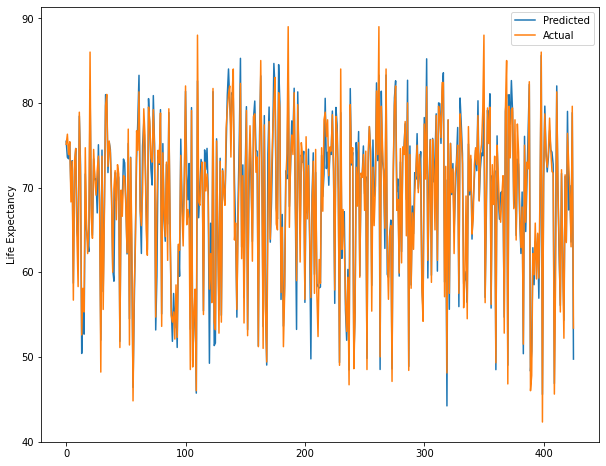

In [46]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(), 'y_pred': y_pred.flatten()}, index=range(len(y_pred)))
print(pred_results.sample(10))
plt.figure(figsize=(10, 8))
plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel("Life Expectancy")
plt.legend()
plt.show()